c:\Users\sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


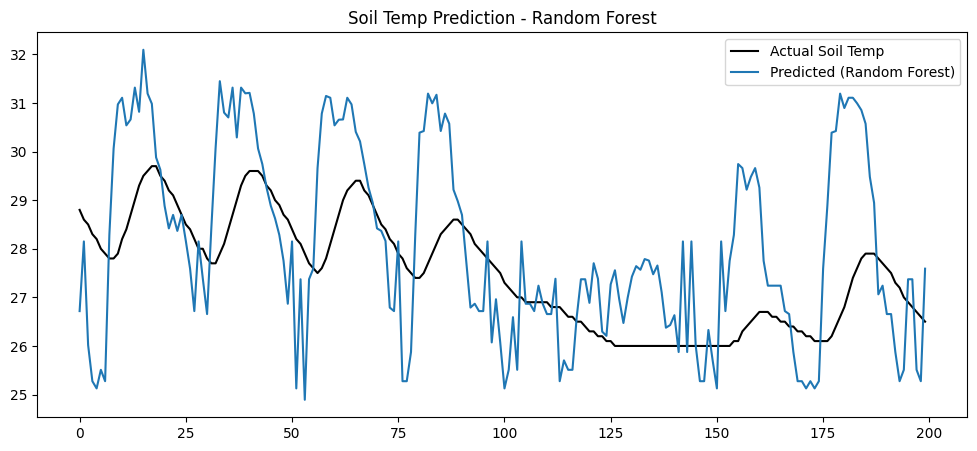

c:\Users\sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


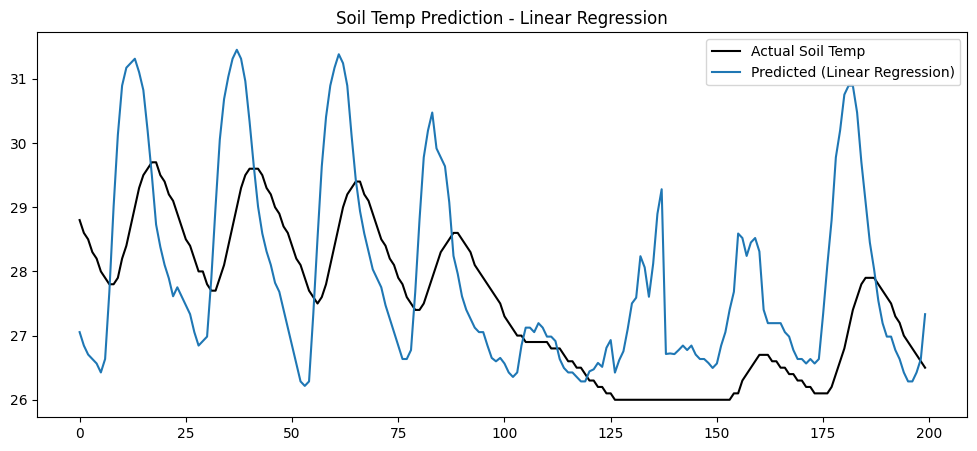

c:\Users\sneha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


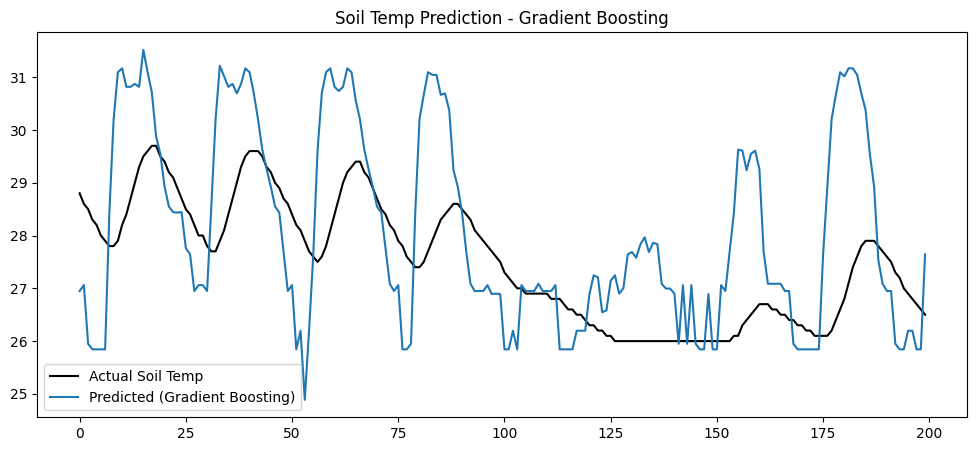


Model Performance (Test Data):

Random Forest:
  MAE: 2.162
  RMSE: 2.892
  R²: 0.073

Linear Regression:
  MAE: 2.080
  RMSE: 2.799
  R²: 0.132

Gradient Boosting:
  MAE: 2.121
  RMSE: 2.859
  R²: 0.094


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# ML models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# ---------------------------
# 1. Load & Clean Data
# ---------------------------
df = pd.read_csv("Kharagpur_weather_data.csv")

# Drop initial rows
df = df.iloc[2:].copy()
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

# Keep required columns
df = df[['time', 'rain (mm)', 'temperature_2m (°C)', 'soil_temperature_18cm (°C)']]
df['time'] = pd.to_datetime(df['time'], format='mixed', errors='coerce')
df = df.sort_values('time')

# Convert to numeric
for col in ['rain (mm)', 'temperature_2m (°C)', 'soil_temperature_18cm (°C)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(inplace=True)

# ---------------------------
# 2. Features & Target
# ---------------------------
X = df[['rain (mm)', 'temperature_2m (°C)']].values
y = df['soil_temperature_18cm (°C)'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Optional scaling (important for linear/boosting, not for RF)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 3. Define Models
# ---------------------------
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
}

results = {}

# ---------------------------
# 4. Train & Evaluate
# ---------------------------
for name, model in models.items():
    if name == "Random Forest":
        # RF does not need scaling
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}
    
    # Plot first 200 test samples for comparison
    plt.figure(figsize=(12,5))
    plt.plot(y_test[:200], label="Actual Soil Temp", color="black")
    plt.plot(y_pred[:200], label=f"Predicted ({name})")
    plt.title(f"Soil Temp Prediction - {name}")
    plt.legend()
    plt.show()

# ---------------------------
# 5. Print Results
# ---------------------------
print("\nModel Performance (Test Data):")
for name, metrics in results.items():
    print(f"\n{name}:")
    for m, v in metrics.items():
        print(f"  {m}: {v:.3f}")
